In [1]:
print("Hello\nJupyter notebook")

Hello
Jupyter notebook


In [2]:
import pyupbit

#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2021-12-08 11:00:00,63028000.0,63376000.0,62704000.0,62705000.0,365.173420,2.301299e+10
2021-12-08 12:00:00,62706000.0,63050000.0,62536000.0,62610000.0,399.379700,2.508638e+10
2021-12-08 13:00:00,62610000.0,62870000.0,62444000.0,62449000.0,271.107940,1.698303e+10
2021-12-08 14:00:00,62448000.0,62714000.0,62320000.0,62479000.0,265.769143,1.661895e+10
2021-12-08 15:00:00,62479000.0,62912000.0,62447000.0,62760000.0,252.211775,1.581709e+10
...,...,...,...,...,...,...
2021-12-16 14:00:00,60726000.0,60967000.0,60448000.0,60448000.0,562.977319,3.417460e+10
2021-12-16 15:00:00,60447000.0,60954000.0,60410000.0,60848000.0,581.886006,3.532715e+10
2021-12-16 16:00:00,60851000.0,60959000.0,60699000.0,60874000.0,331.274695,2.016259e+10
2021-12-16 17:00:00,60874000.0,61050000.0,60701000.0,60777000.0,510.860220,3.109808e+10


In [3]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-12-08 11:00:00,62705000.0
1,2021-12-08 12:00:00,62610000.0
2,2021-12-08 13:00:00,62449000.0
3,2021-12-08 14:00:00,62479000.0
4,2021-12-08 15:00:00,62760000.0
...,...,...
195,2021-12-16 14:00:00,60448000.0
196,2021-12-16 15:00:00,60848000.0
197,2021-12-16 16:00:00,60874000.0
198,2021-12-16 17:00:00,60777000.0


In [4]:
#prophet 불러옴
#from fbprophet import Prophet
from prophet import Prophet

#학습
model = Prophet()
model.fit(data)

Importing plotly failed. Interactive plots will not work.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -2.09252


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       838.868    0.00232741       437.044      0.7787      0.7787      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       846.086     0.0057069       645.408        4.27       0.427      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       847.599   1.97776e-05       72.8748   9.428e-08       0.001      371  LS failed, Hessian reset 
     299       847.743   0.000203271       113.779      0.7718      0.7718      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       848.296   3.94169e-05       168.203   9.873e-08       0.001      533  LS failed, Hessian reset 
     399       848.534   3.47225e-06       53.7708           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha

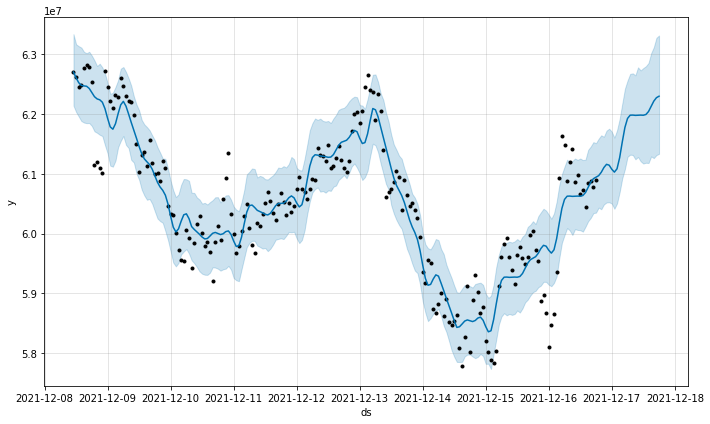

In [5]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

#그래프1
fig1 = model.plot(forecast)

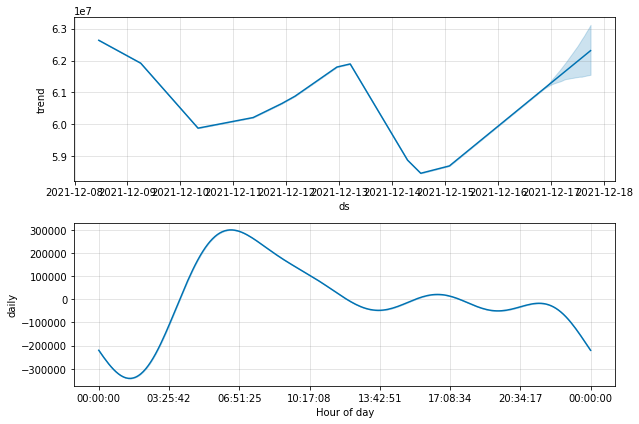

In [6]:
#그래프2
fig2 = model.plot_components(forecast)

In [7]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

60900000.0

In [8]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0] # yhat : 예측
closeValue

61975876.92117156

In [9]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  60900000.0
종가의 가격:  61975876.92117156


In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-08 11:00:00,6.263563e+07,6.213838e+07,6.333362e+07,6.263563e+07,6.263563e+07,64525.464282,64525.464282,64525.464282,64525.464282,64525.464282,64525.464282,0.0,0.0,0.0,6.270016e+07
1,2021-12-08 12:00:00,6.259792e+07,6.203328e+07,6.316393e+07,6.259792e+07,6.259792e+07,5633.824150,5633.824150,5633.824150,5633.824150,5633.824150,5633.824150,0.0,0.0,0.0,6.260356e+07
2,2021-12-08 13:00:00,6.256021e+07,6.195711e+07,6.313276e+07,6.256021e+07,6.256021e+07,-38432.446075,-38432.446075,-38432.446075,-38432.446075,-38432.446075,-38432.446075,0.0,0.0,0.0,6.252178e+07
3,2021-12-08 14:00:00,6.252250e+07,6.188131e+07,6.310870e+07,6.252250e+07,6.252250e+07,-44991.890859,-44991.890859,-44991.890859,-44991.890859,-44991.890859,-44991.890859,0.0,0.0,0.0,6.247751e+07
4,2021-12-08 15:00:00,6.248479e+07,6.185598e+07,6.303775e+07,6.248479e+07,6.248479e+07,-16308.984563,-16308.984563,-16308.984563,-16308.984563,-16308.984563,-16308.984563,0.0,0.0,0.0,6.246848e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-12-17 14:00:00,6.208517e+07,6.117963e+07,6.285219e+07,6.149411e+07,6.266635e+07,-44991.890859,-44991.890859,-44991.890859,-44991.890859,-44991.890859,-44991.890859,0.0,0.0,0.0,6.204017e+07
220,2021-12-17 15:00:00,6.214158e+07,6.129023e+07,6.301480e+07,6.151147e+07,6.277014e+07,-16308.984565,-16308.984565,-16308.984565,-16308.984565,-16308.984565,-16308.984565,0.0,0.0,0.0,6.212527e+07
221,2021-12-17 16:00:00,6.219799e+07,6.126139e+07,6.311404e+07,6.152740e+07,6.288860e+07,15455.677418,15455.677418,15455.677418,15455.677418,15455.677418,15455.677418,0.0,0.0,0.0,6.221345e+07
222,2021-12-17 17:00:00,6.225440e+07,6.131189e+07,6.327163e+07,6.154084e+07,6.299944e+07,16580.925516,16580.925516,16580.925516,16580.925516,16580.925516,16580.925516,0.0,0.0,0.0,6.227098e+07
